In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import zipfile
from google.colab import drive
z = zipfile.ZipFile("/content/drive/MyDrive/Malaria/archive.zip",'r')
z.extractall("/content/drive/MyDrive/Malaria/malaria_data")
z.close()

In [3]:
!pip install split_folders
!pip install tensorflow 

^C


In [4]:
import tensorflow.compat.v2 as tf 
from keras import backend as k 
from keras.applications.mobilenet import MobileNet
from keras.applications import imagenet_utils
import keras.applications
from keras.engine import training
from keras.layers import VersionAwareLayers
from keras.utils import data_utils
from keras.utils import layer_utils
from tensorflow.keras.utils import Sequence
from tensorflow.python.util.tf_export import keras_export
from keras.layers import Dense,GlobalAveragePooling2D, Dropout
from keras.models import Model
from keras.layers import Flatten
from keras.callbacks import CSVLogger
from keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import classification_report
import seaborn as sns 
# from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet import ResNet152,  preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg19 import preprocess_input
# from tensorflow.keras.applications.inception_v3  import preprocess_input, InceptionV3
import numpy as np 
import matplotlib.pyplot as plt 
# import splitfolders



In [ ]:
# from splitfolders.split import ratio
# input_path = "/content/drive/MyDrive/Malaria/malaria_data/cell_images"
# splitfolders.ratio(input_path,output = "/content/drive/MyDrive/Malaria/train_test_val",seed = 42,ratio = (0.2,0.2,0.6),group_prefix=None)

In [ ]:
train_path = "/content/drive/MyDrive/Malaria/train_test_val/train"
val_path = "/content/drive/MyDrive/Malaria/train_test_val/val"
test_path = "/content/drive/MyDrive/Malaria/train_test_val/test"
pre_process_input = tf.keras.applications.resnet.preprocess_input
generator = ImageDataGenerator(preprocessing_function=pre_process_input)
size = 224
train_data = generator.flow_from_directory(train_path,
 target_size=(size,size),batch_size= 32,
 class_mode='categorical' )

val_data = generator.flow_from_directory(val_path,
 target_size=(size,size),batch_size= 32,
 class_mode='categorical' )


test_data = generator.flow_from_directory(test_path,
 target_size=(size,size),batch_size= 32,
 class_mode='categorical',shuffle=False )

print(train_data.classes)
print(val_data.classes)

Found 4564 images belonging to 2 classes.
Found 4565 images belonging to 2 classes.
Found 13695 images belonging to 2 classes.
[0 0 0 ... 1 1 1]
[0 0 0 ... 1 1 1]


In [ ]:

image_size = [size,size]
model = ResNet152(input_shape= image_size + [3],weights='imagenet',include_top=False)

for layer in model.layers:
  layer.trainable = False
x = Flatten()(model.output)
# x = Dense(64,activation='softmax')(x)
# x= Dropout(0.5)(x)
# x = Dense(32,activation='softmax')(x)
# x= Dropout(0.5)(x)
x = Dense(2,activation='softmax')(x)
classifier = Model(inputs = model.input,outputs = x)
classifier.compile(loss='categorical_crossentropy',optimizer = 'adam',metrics=['accuracy'])


In [9]:
his = classifier.fit(train_data,validation_data=val_data,epochs=30)

# classifier.save("/content/drive/MyDrive/Malaria/VGG19_malaria.h5")



Epoch 1/30
143/143 [==============================] - 1030s 7s/step - loss: 0.8798 - accuracy: 0.9406 - val_loss: 1.4927 - val_accuracy: 0.9277
Epoch 2/30
143/143 [==============================] - 73s 515ms/step - loss: 0.8499 - accuracy: 0.9522 - val_loss: 1.0761 - val_accuracy: 0.9426
Epoch 3/30
143/143 [==============================] - 73s 513ms/step - loss: 0.2604 - accuracy: 0.9779 - val_loss: 1.6240 - val_accuracy: 0.9218
Epoch 4/30
143/143 [==============================] - 73s 511ms/step - loss: 0.2133 - accuracy: 0.9807 - val_loss: 1.5459 - val_accuracy: 0.9345
Epoch 5/30
143/143 [==============================] - 73s 511ms/step - loss: 0.0966 - accuracy: 0.9888 - val_loss: 1.2173 - val_accuracy: 0.9417
Epoch 6/30
143/143 [==============================] - 73s 510ms/step - loss: 0.3148 - accuracy: 0.9746 - val_loss: 1.3194 - val_accuracy: 0.9474
Epoch 7/30
143/143 [==============================] - 73s 510ms/step - loss: 0.1274 - accuracy: 0.9888 - val_loss: 2.1557 - val_acc

In [10]:
classifier.save("/content/drive/MyDrive/Malaria/resnet152_malaria.h5")

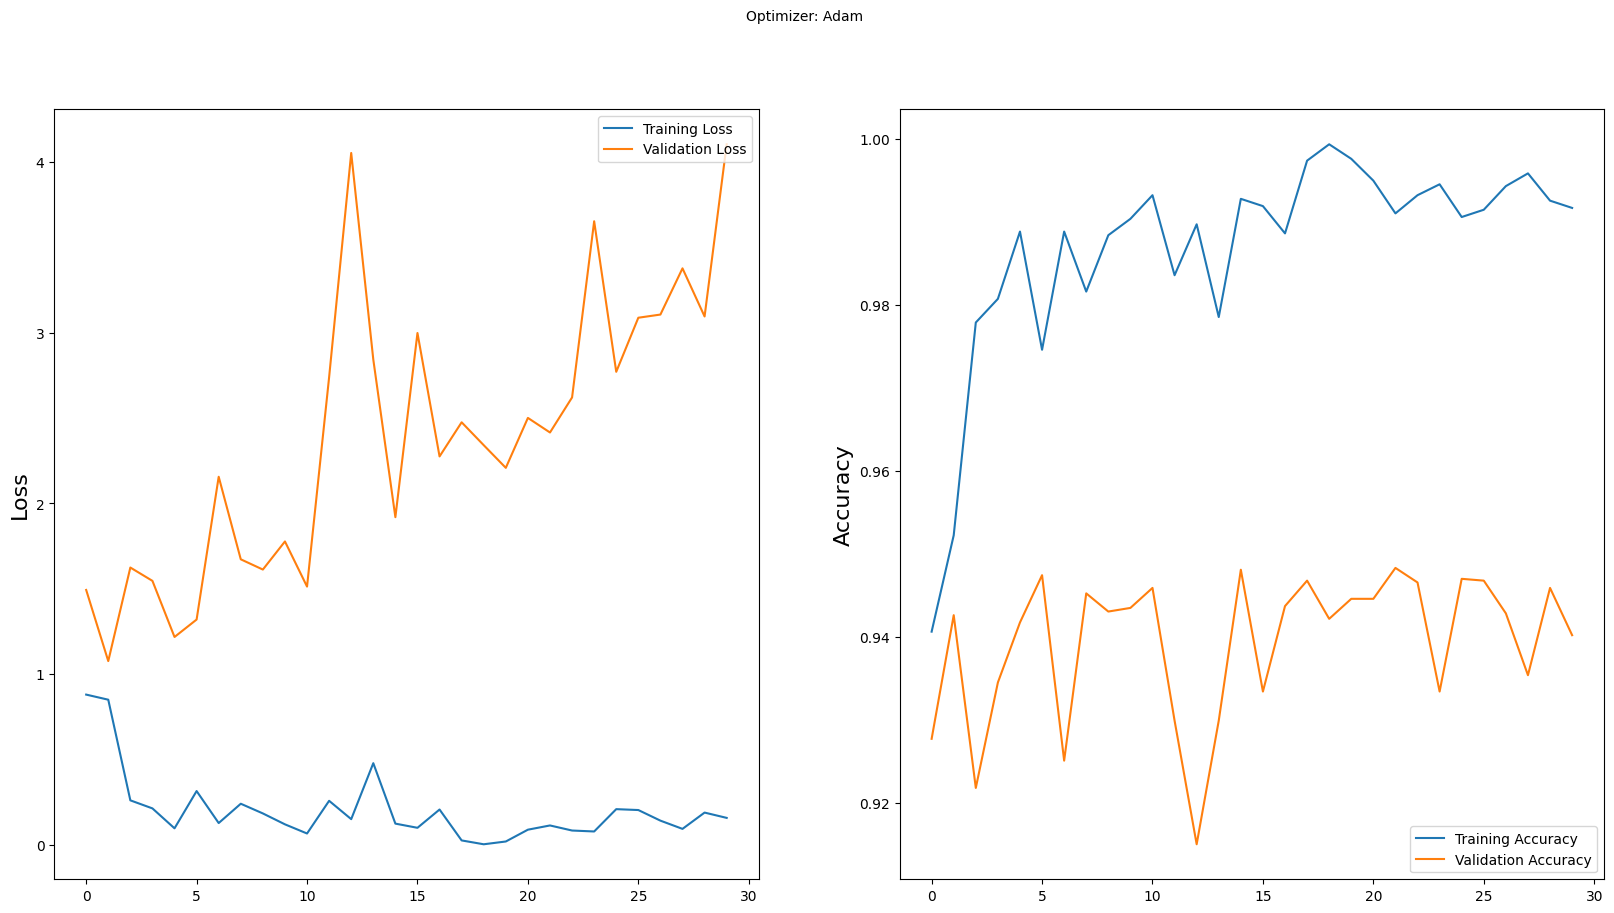

In [11]:
plt.figure(figsize = (20,10))
plt.subplot(1,2,1)
plt.suptitle("Optimizer: Adam", fontsize = 10)
plt.ylabel("Loss",fontsize = 16)

plt.plot(his.history['loss'],label = "Training Loss")
plt.plot(his.history['val_loss'],label = "Validation Loss")
plt.legend(loc = 'upper right')

plt.subplot(1,2,2)

plt.ylabel("Accuracy",fontsize = 16)

plt.plot(his.history['accuracy'],label = "Training Accuracy")
plt.plot(his.history['val_accuracy'],label = "Validation Accuracy")
plt.legend(loc = 'lower right')




In [ ]:
from sklearn.metrics import accuracy_score

y_true = test_data.classes
print(y_true)
pred = classifier.predict(test_data)
pred = tf.argmax(pred,axis = 1)
print(accuracy_score(pred,y_true))


[0 0 0 ... 1 1 1]
122/428 [=======>......................] - ETA: 18:33

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd
cm = confusion_matrix(y_true, pred)

print(cm)
acc = str(accuracy_score(y_true, pred)*100)
acc = acc[0:5]
print(acc)
cm_df = pd.DataFrame(cm,index = 
[0,1,2], columns = 
[0,1,2])
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True,cmap=plt.cm.BuPu)
plt.title('Confusion Matrix with Accuracy of: {0}%'.format(acc))
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()


In [2]:
from tensorflow.keras.models import load_model
model = load_model(r'D:\projects\Malaria\ResNetMalaria.h5')

1/1 [==============================] - 0s 217ms/step
[0.0000000e+00 4.2591256e-12 1.0000000e+00]
2


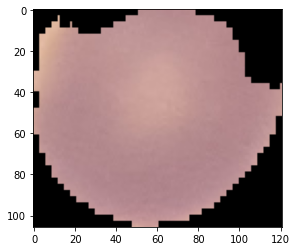

In [26]:
path = r'D:\projects\Malaria\cell_images\Uninfected\C1_thinF_IMG_20150604_104722_cell_15.png'

plt.imshow(plt.imread(path) )
img = tf.keras.preprocessing.image.load_img(path, target_size=(128, 128))
img = tf.keras.preprocessing.image.img_to_array(img)

img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
f = model.predict(img,)[0]
print(f)
label = np.argmax(f)
print(label)


tf.Tensor(1, shape=(), dtype=int64)
